In [2]:
import pandas as pd
df_temp=pd.read_csv('/home/beyhan/MachineLearningForTrading/data/AAPL.csv',index_col="Date",parse_dates=True,usecols=['Date','Adj Close'],na_values=['nan'])


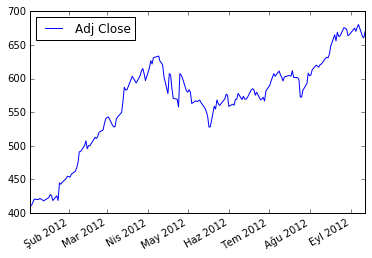

In [11]:
import  matplotlib
from  matplotlib import pyplot as plt
""" plot  stock prices"""
%matplotlib inline

dates=pd.date_range('2012-01-01', '2013-12-31')
df=pd.DataFrame(index=dates)
df=df.join(df_temp,how='inner')

df.plot()

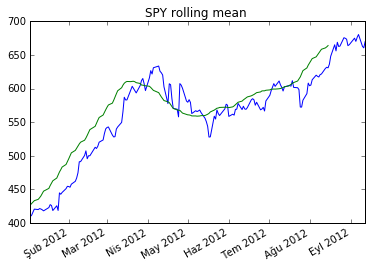

In [15]:
rm_SPY=pd.rolling_mean(df['Adj Close'], window=20)
ax=df['Adj Close'].plot(title='SPY rolling mean ',label="SPY")

rm_SPY.plot(label='ROLLING MEAN',ax=ax)


In [17]:
def get_rolling_mean(values,window):
    return pd.rolling_mean(values,window=window)

In [18]:
def get_rolling_std(values,window):
    return pd.rolling_std(values,window=window)

In [23]:
def get_bollinger_bands(rm,rstd):
    upper_bands=rm+rstd*2
    lower_bands=rm-rstd*2
    return upper_bands,lower_bands

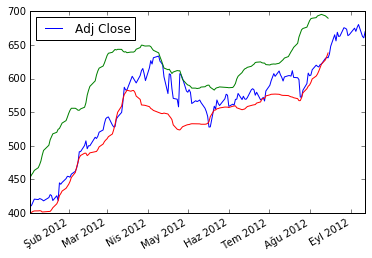

In [41]:
rm1=get_rolling_mean(df['Adj Close'],window=20)
rm2=get_rolling_std(df['Adj Close'],window=20)

upper_band,lower_band=get_bollinger_bands(rm1,rm2)

df.plot(label='asd')
upper_band.plot(label='upper')
lower_band.plot(label='upper')
#rm1.plot(label='rm1')

### Daily close prices

In [78]:
def compute_daily_returns(df):
    daily_returns=df.copy()
    daily_returns=(df[1:]/df[:-1].values)-1
    daily_returns.ix[0,:]=0
    return daily_returns


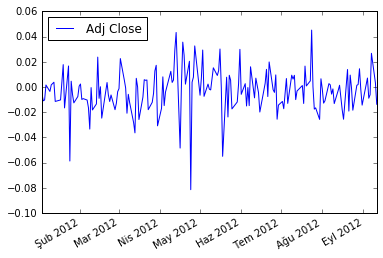

In [80]:
gelen=compute_daily_returns(df)
gelen.plot()